<a href="https://colab.research.google.com/github/KarynA19/Cloud-Computing/blob/main/tirgul6_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install firebase bs4 requests

from firebase import firebase
from bs4 import BeautifulSoup
import requests
import re
from collections import Counter

# התחברות ל-Firebase
firebase_url = 'https://tirgul6-49fec-default-rtdb.firebaseio.com/'  # החלף ב-URL שלך
FBconn = firebase.FirebaseApplication(firebase_url, None)

# שלב 1: שליפת טקסט מהאתר
def fetch_website_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    # ניקוי תגיות
    text = soup.get_text(separator=' ')
    return text

# שלב 2: ניתוח טקסט
def extract_top_words(text, stop_words, top_n=10):
    words = re.findall(r'\b\w+\b', text.lower())
    filtered = [w for w in words if w not in stop_words and len(w) > 2]
    word_freq = Counter(filtered)
    return word_freq.most_common(top_n)

# שלב 3: שמירה ל-Firebase
def save_index_to_firebase(index):
    index_dict = {word: {"count": count} for word, count in index}
    FBconn.put('/', 'word_index', index_dict)
    print("save in firbase")

# רשימת stop words בסיסית
stop_words = {'the', 'and', 'for', 'are', 'that', 'with', 'this', 'you', 'your', 'from', 'use', 'can', 'all', 'has', 'was', 'will', 'but'}

# הפעלת התהליך
url = 'https://mqtt.org/'
text = fetch_website_text(url)
top_words = extract_top_words(text, stop_words, top_n=10)
save_index_to_firebase(top_words)


save in firbase


devices: 3
getting: 3
iot: 6
messaging: 5
mqtt: 19
small: 4
standard: 3
started: 3
things: 3
used: 3


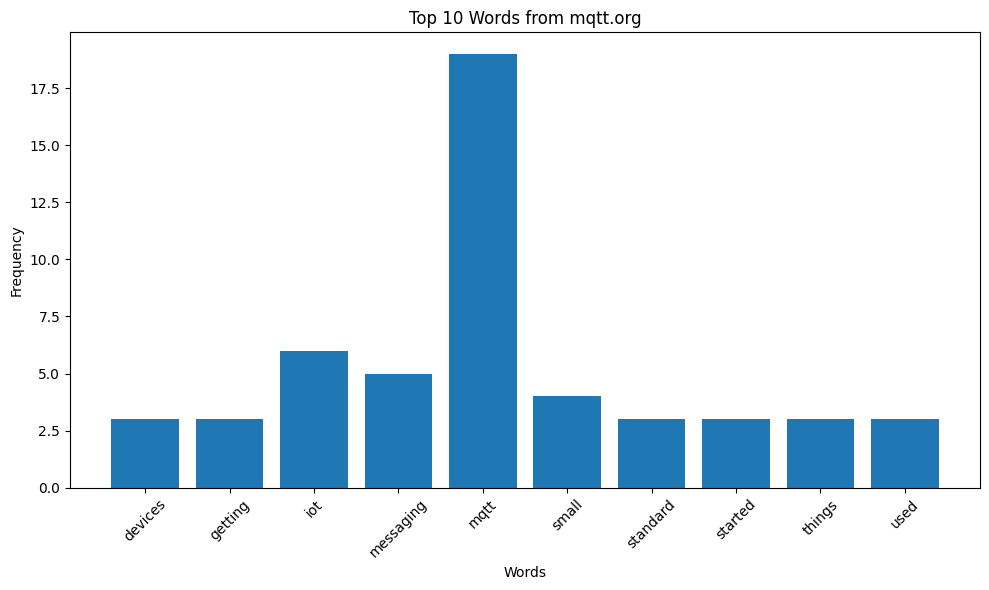

In [8]:
from firebase import firebase
import matplotlib.pyplot as plt

# התחברות ל-Firebase
firebase_url = 'https://tirgul6-49fec-default-rtdb.firebaseio.com/'  # עדכן את ה-URL
FBconn = firebase.FirebaseApplication(firebase_url, None)

# שליפה
index = FBconn.get('/word_index', None)

# הצגה
for word, data in index.items():
    print(f"{word}: {data['count']}")

# גרף
words = list(index.keys())
counts = [index[word]['count'] for word in words]

plt.figure(figsize=(10,6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 10 Words from mqtt.org")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
